In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the data
pickle_in = open("X.picktest2","rb")
X_test = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open("y.picktest2","rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [4]:
pickle_in = open("scalerX-2.pickRN","rb")
scaler_X = pickle.load(pickle_in)
pickle_in.close()

In [5]:
print(X_test.shape)
print(y_test.shape)

(6277, 47)
(6277, 12)


In [5]:
model= tf.keras.models.load_model('NN-200-128-256.keras') 

In [6]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 4.5033e-04
Test loss: 0.0004395271243993193


In [7]:
y_pred = model.predict([X_test])

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [8]:
y_test_norm=scaler_X.inverse_transform(y_test)
y_pred_norm=scaler_X.inverse_transform(y_pred)

In [9]:
loss = keras.losses.mean_absolute_percentage_error(y_test_norm, y_pred_norm)
mean_loss=0
for i in range(0, len(loss)):
    mean_loss= mean_loss+loss[i]
mean_loss=mean_loss/(len(loss))
print(f'Test media MAPE: {mean_loss}')

Test media MAPE: 23.036394119262695


In [10]:
y_test_mean=[]
y_pred_mean=[]
for i in range(0,len(y_test)):
    y_test_mean.append(np.mean(y_test_norm[i]))
    y_pred_mean.append(np.mean(y_pred_norm[i]))                   

print(len(y_pred_mean))

6278


C:\Users\dessa\AppData\Local\Temp\ipykernel_12064\3205976886.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


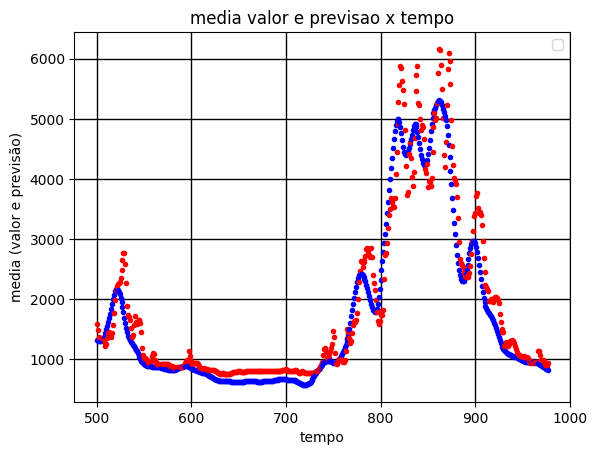

In [11]:
plt.grid(color='k', linestyle='-', linewidth=1)
for i in range(500,len(y_test)-5300):
    plt.plot(i,y_test_mean[i],'b.')
    plt.plot(i,y_pred_mean[i],'r.')
    

plt.title('media valor e previsao x tempo')
plt.xlabel('tempo')
plt.ylabel('media (valor e previsão)')
plt.legend()
plt.show()